# 05. Python Basic (6)

GC  
2023-08-17

# 파일 다루기

## 경로 설정

`-` 홈 디렉토리를 불러오는 명령어

In [1]:
from pathlib import Path
print(Path.home())

C:\Users\user

`-` 현재 작업 디렉토리 확인

In [3]:
print(Path.cwd())

C:\projects\mysite2\posts\DX\0. 데이터 다루기

-   `Path.cwd().glob()` $\to$ 해당 경로안에 있는 파일들의 목록을 확인

In [6]:
from pathlib import Path

files = Path.cwd().glob('*')

for f in files:
     print(f)

C:\projects\mysite2\posts\DX\0. 데이터 다루기\.ipynb_checkpoints
C:\projects\mysite2\posts\DX\0. 데이터 다루기\2023-08-09-00. Python Basic (1).ipynb
C:\projects\mysite2\posts\DX\0. 데이터 다루기\2023-08-10-01. Python Basic (2) .ipynb
C:\projects\mysite2\posts\DX\0. 데이터 다루기\2023-08-11-02. Python Basic (3) .ipynb
C:\projects\mysite2\posts\DX\0. 데이터 다루기\2023-08-14-03. Python Basic (4).ipynb
C:\projects\mysite2\posts\DX\0. 데이터 다루기\2023-08-16-04. Python Basic (5).ipynb
C:\projects\mysite2\posts\DX\0. 데이터 다루기\2023-08-17-05. Python Basic (6).ipynb
C:\projects\mysite2\posts\DX\0. 데이터 다루기\extra
C:\projects\mysite2\posts\DX\0. 데이터 다루기\repr.png

------------------------------------------------------------------------

## 파일 쓰기(`W : write`)

In [7]:
f = open("gc.txt", "w")

f.write("gc test\n")

f.close()

`-` 파일 생성 확인

<img src = "gctxt.png" width=300>

`-` 디렉토리 만들기

-   `exist_ok = True` : 아래와 같이 `Files`이라는 폴더가 존재하면 있는
    폴더를 쓰고 없을 경우 만들어서 씀

In [11]:
Path("Files").mkdir(exist_ok = True)

`-` 에러문 확인!

In [12]:
Path("Files").mkdir(exist_ok = False)

`-` 생성한 디렉토리에 파일을 쓰기

In [9]:
f = open("Files/gc.txt", "w")

f.write("gc test\n")

f.close()

## 파일 읽기 (`R : read`)

In [14]:
f = open("Files/gc.txt","r")

print(f.read())

f.close()

gc test


## 파일 추가 (`a : append`)

`-` 지정한 파일이 없으면 새로운 파일을 생성한다.

In [15]:
f = open("Files/gc.txt","a")

f.write("test를 확인 중입니다.")

f.close()

In [18]:
f = open('Files/gc.txt', 'r')
print(f.read())
f.close()

gc test
test를 확인 중입니다.

## 파일 존재 유무 확인 (`x`)

`-` **\[Errno 17\] File exists: ‘Files/gc.txt’**

In [19]:
f = open('Files/gc.txt', 'x')

### 에러핸들링 : 같은 이름의 파일이 있으면 오류 출력

In [20]:
try : 
    f = open('Files/gc.txt', 'x')
except FileExistsError :
    print("이미 파일이 존재합니다.")
else : 
    print ("파일 쓰기 성공!")

이미 파일이 존재합니다.

## excercise

### ex1. 임의의 파일생성

In [36]:
f = open("test.txt","w")
f.close()

<img src = "test.png" width = 300>

### ex2. 파일을 열어 나이와 이름을 입력

In [37]:
f = open("test.txt","a")

f.write("이름 : 이강철\n 나이 : 28세")

f.close()

### ex3. 파일을 읽어 파일 내용 출력

In [38]:
f = open("test.txt","r")

print(f.read())

이름 : 이강철
 나이 : 28세

------------------------------------------------------------------------

## 파일 쓰기 (`writelines()`)

In [39]:
l = ["이강철\n","28세\n", "통계학 전공\n"]

f = open("test2.txt","w")

f.writelines(l)
f.close()

In [41]:
f = open("test2.txt","r")
print(f.read())

이강철
28세
통계학 전공


## 파일 읽기(`readlines()`)

In [44]:
f = open("test2.txt","r")
result = f.readlines() 
print(result)

['이강철\n', '28세\n', '통계학 전공\n']

In [46]:
for txt in result:
    print(txt,end="")

이강철
28세
통계학 전공

## 파일 읽기 (`readline() : 한 행씩`)

In [100]:
f = open("test2.txt","r")

result = f.readline()
while result : 
    print(result,end="")
    result = f.readline()
f.close()

이강철
28세
통계학 전공

------------------------------------------------------------------------

# 워드 클라우드

In [82]:
txt ="The generative model can be thought of as analogous to a team of counterfeiters, trying to produce fake currency and use it without detection, while the discriminative model is analogous to the police, trying to detect the counterfeit currency. Competition in this game drives both teams to improve their methods until the counterfeits are indistiguishable from the genuine article"

In [83]:
txt

`-` 공백을 기준으로 단어 생성

In [84]:
word = txt.split(" ")

`-` 단어 중복 제거

In [85]:
w_u = set(word)

`-` 단어와 개수를 쌍으로 하는 딕셔너리 생성

In [87]:
w_c = {i : word.count(i) for i in w_u}

In [88]:
w_c

`-` 불용어 삭제

In [89]:
del_word = ["the",'The','a','is','are', 'not','of','on','that','this','and','be','to', 'from']

In [90]:
for w in del_word :
    if w in w_c :
        del w_c[w]

In [91]:
w_c

## 패키지 설치

In [93]:
#!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## 워드클라우드 생성

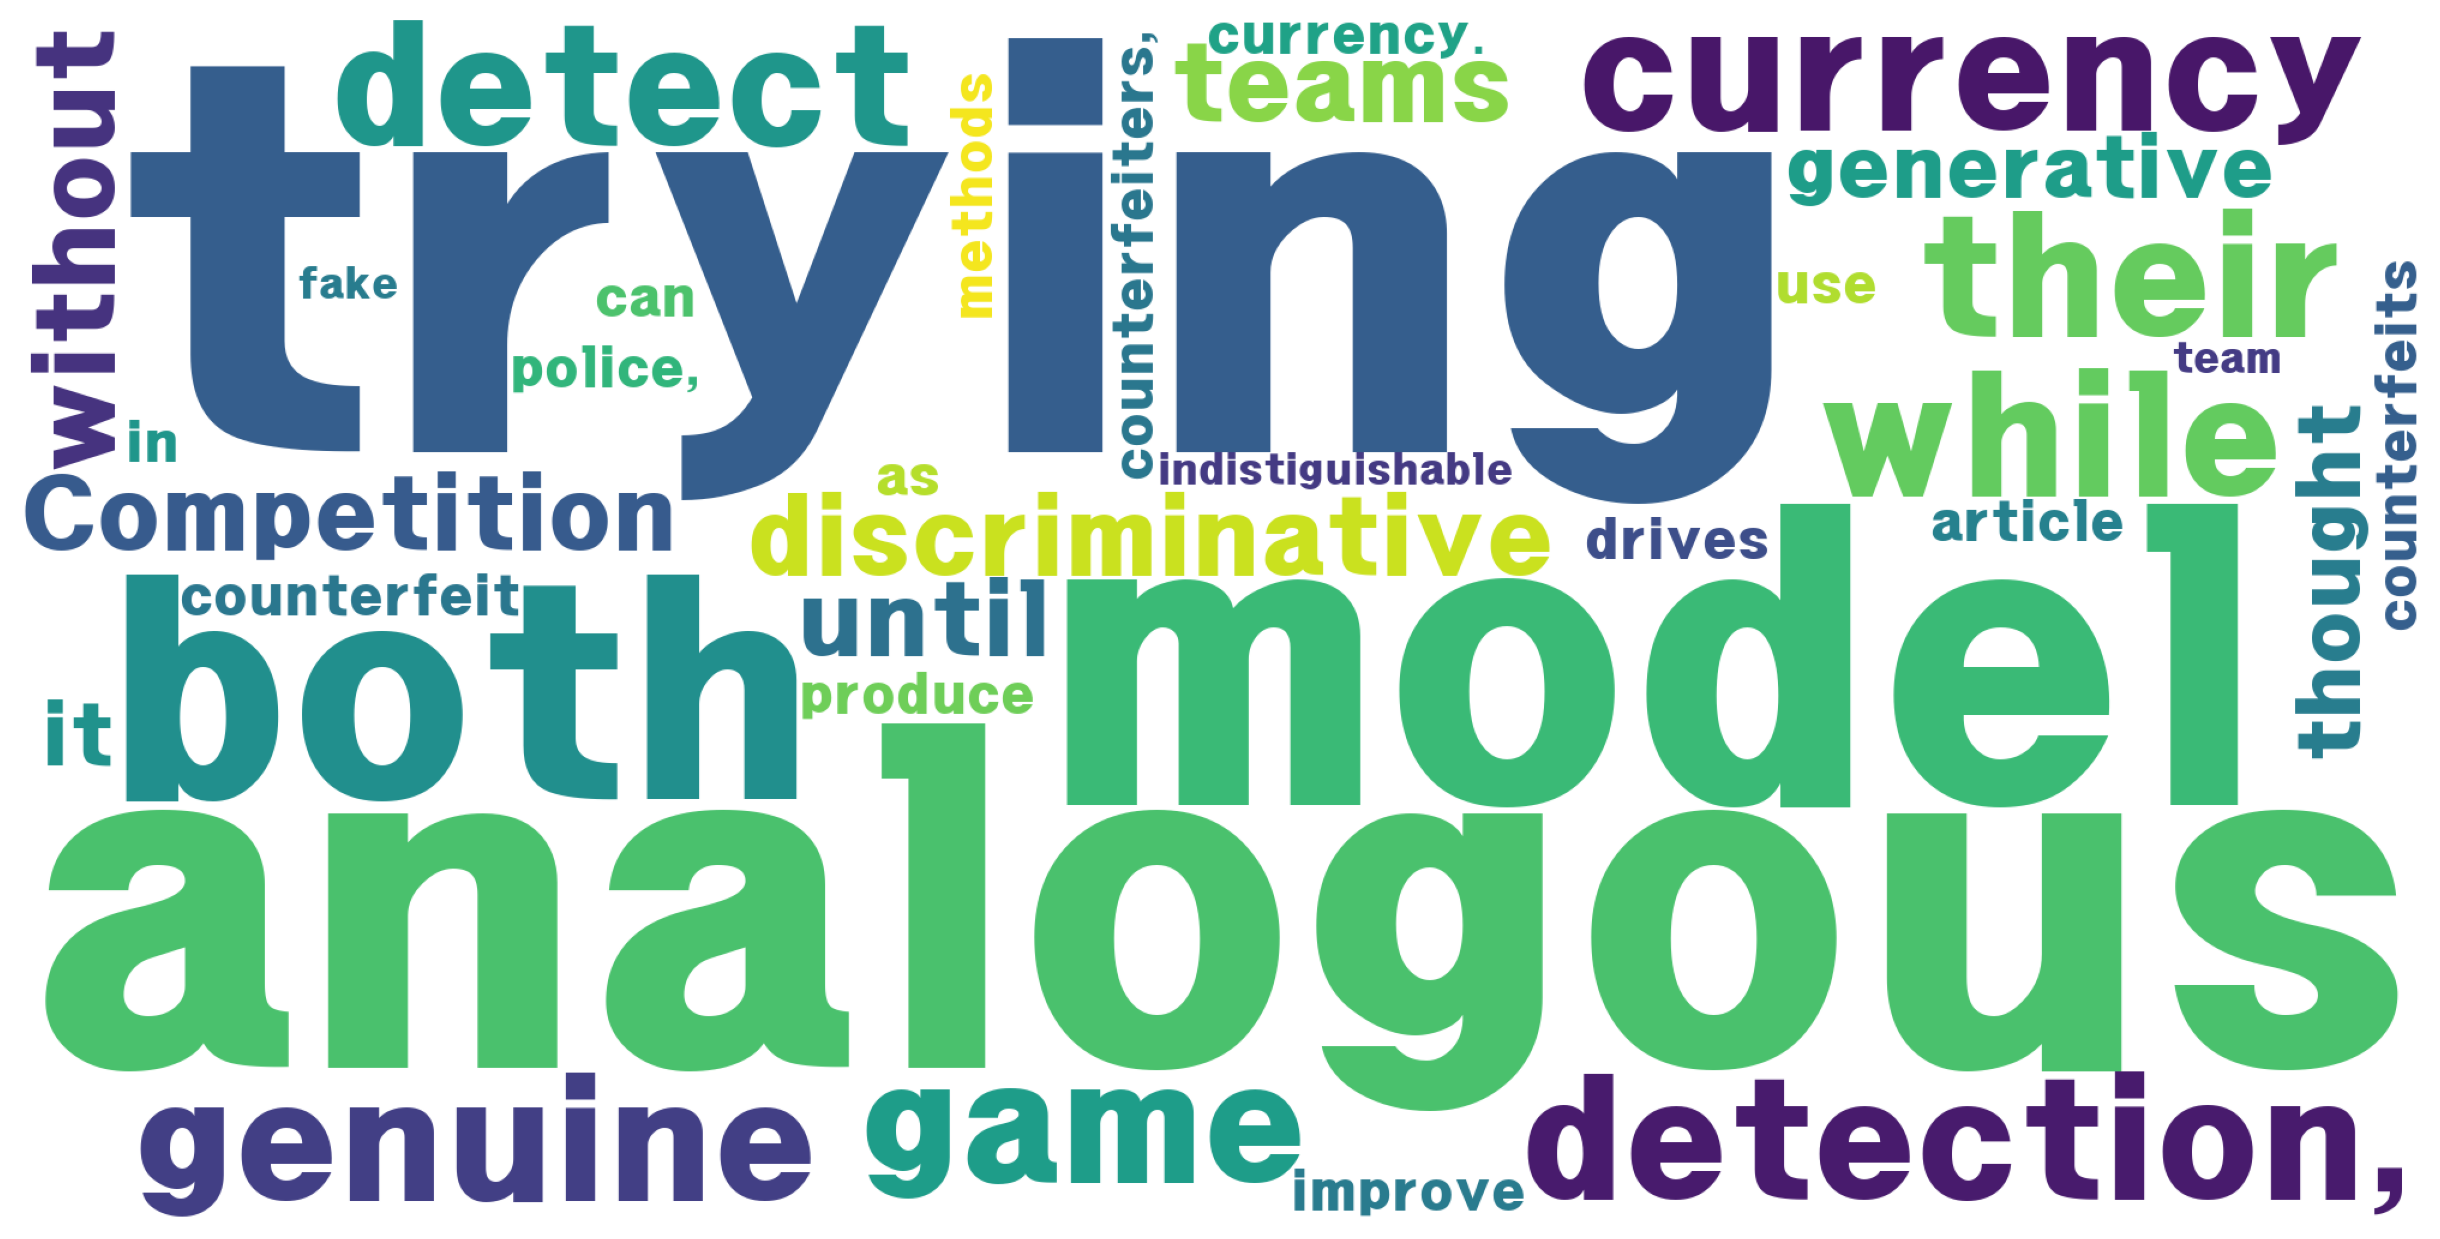

In [95]:
%config InlineBackend.figure_format='retina' ## 이미지 포맷

# 워드 클라우드 만들기
wordcloud = WordCloud(font_path = 'C:/Windiws/fonts/HMKMRHD.TTF',  ## 글씨 폰트
                      width=2000,
                      height=1000,
                      background_color='white').generate_from_frequencies(w_c) ##우리가 만든 워드 카운트를전달

# 표시하기
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## extra : 이미지 파일

`-` 이미지 파일을 사용해 워드클라우드의 프레임 변셩

### import

In [111]:
#pip install opencv-python

In [112]:
import numpy as np
from PIL import Image ## 이미지를 불러오기 위한 모듈
import cv2 as cv

### 해당 이미지 확인

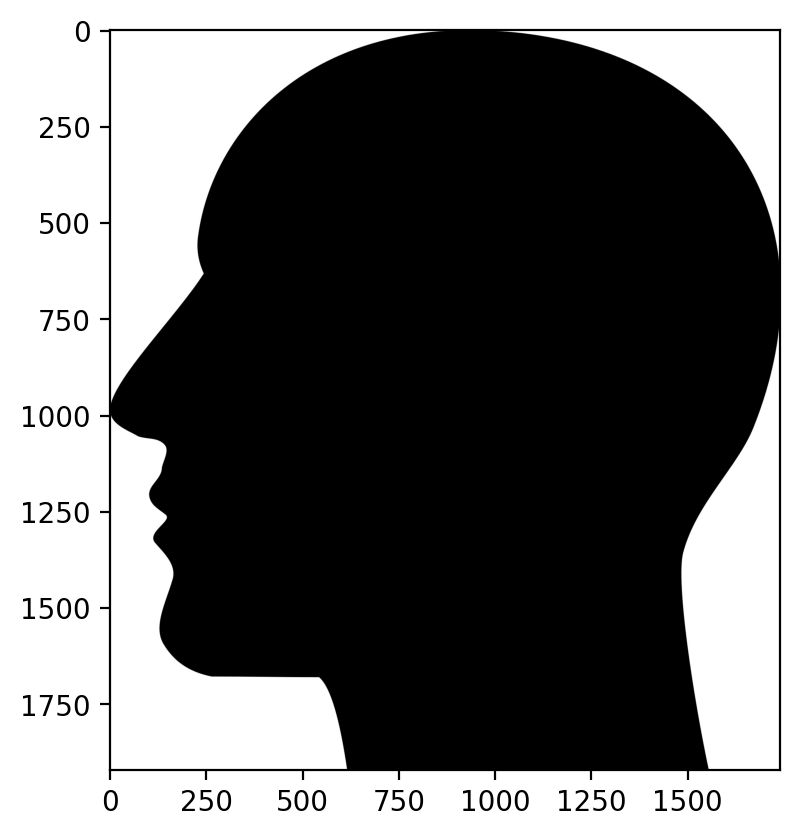

In [132]:
h = cv.imread("human.jpg")
plt.imshow(h)

### 워드클라우드와 함께 그리기

In [133]:
m_image = np.array(Image.open("human.jpg"))

wordcloud = WordCloud(font_path = 'C:/Windiws/fonts/HMKMRHD.TTF',
                      width=2000, 
                      height=1000, 
                      mask=m_image,
                      background_color='white').generate_from_frequencies(w_c)

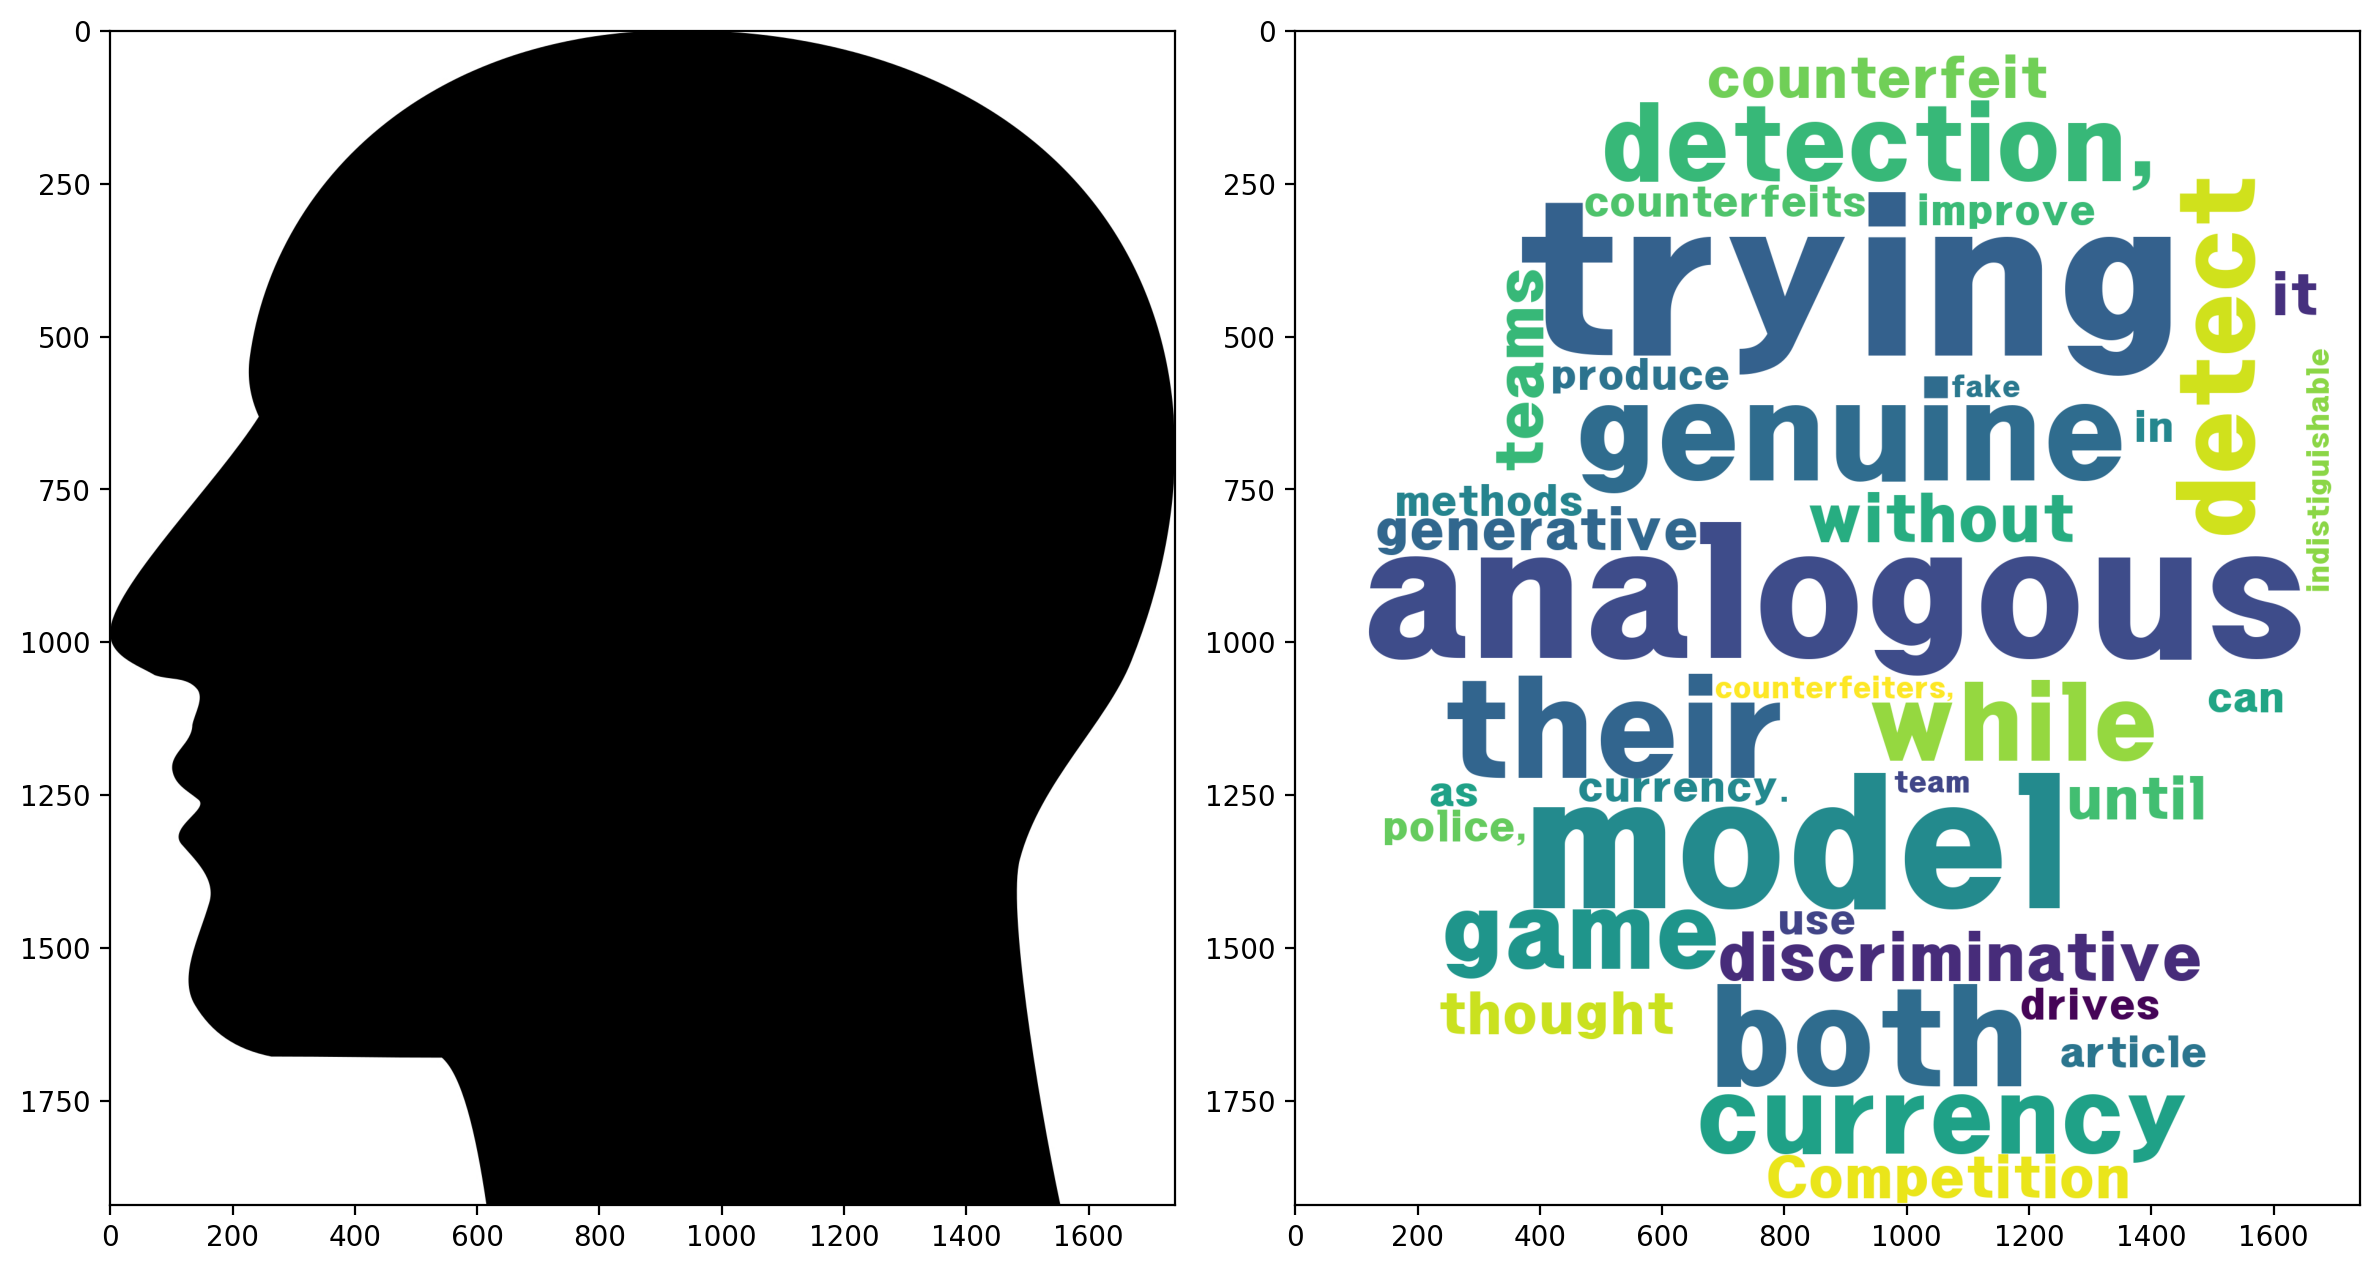

In [136]:
fig, axes = plt.subplots(1,2,figsize=(12,8))

ax1,ax2 = axes

ax1.imshow(h)
ax2.imshow(wordcloud)
fig.tight_layout()

`-` 원래 강아지 사진으로 하려고 했는데 강아지 모양이 안나왔다.

-   **아마 해당 사진에 위 사진처럼 흰색의 공간이 없어서 그런것
    같다..ㅜㅜ**

-   **개인적으로 워드클라우드를 선호하지 않으니 쓰는 방법만
    기록해두자!**

## 꽃 사진으로 워드클라우드!

In [148]:
flower=  cv.imread("flower.png")

In [147]:
m_image = np.array(Image.open("flower.png"))

wordcloud = WordCloud(font_path = 'C:/Windiws/fonts/HMKMRHD.TTF',
                      width=2000, 
                      height=1000, 
                      mask=m_image,
                      background_color='white').generate_from_frequencies(w_c)

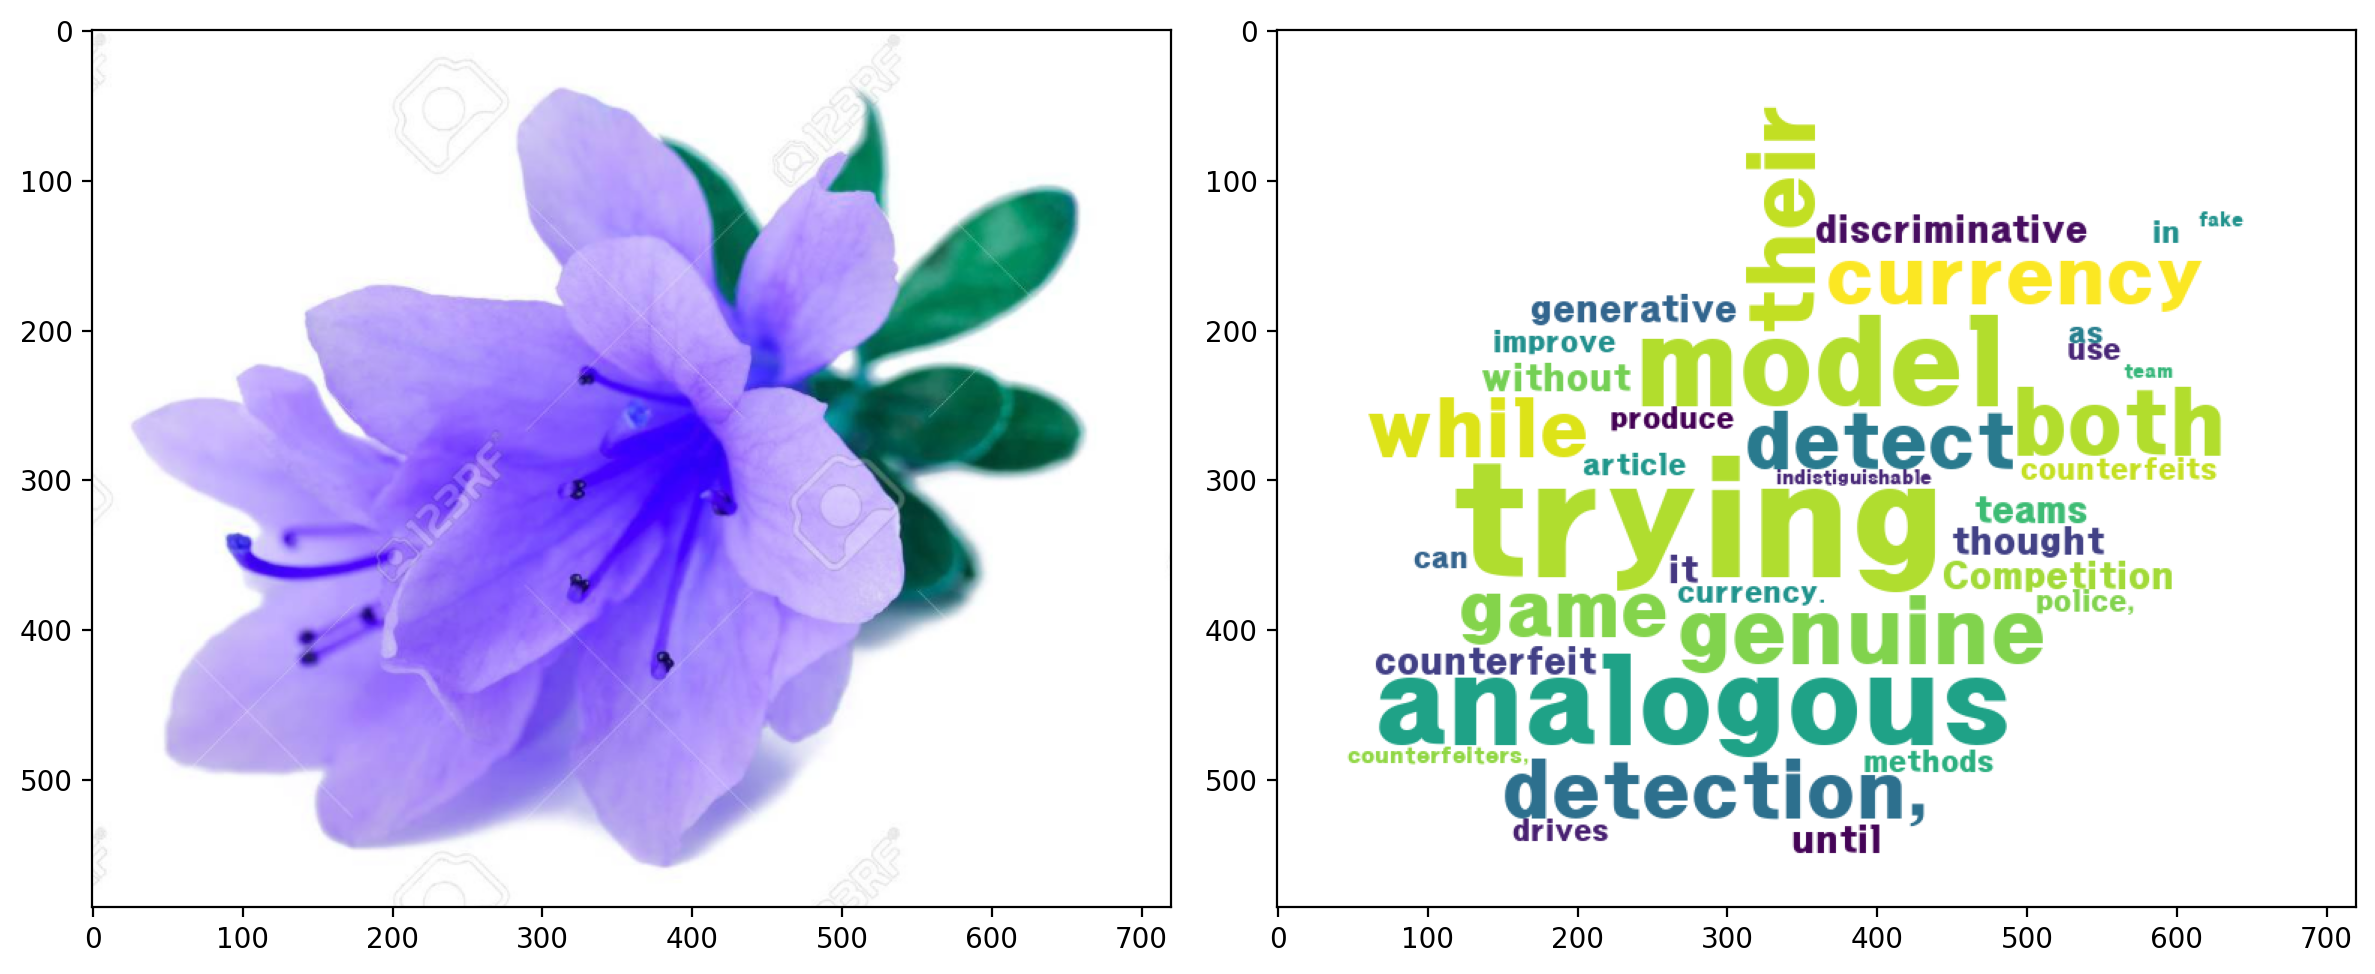

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(12,8))

ax1,ax2 = axes

ax1.imshow(flower)
ax2.imshow(wordcloud)
fig.tight_layout()

# 기분전환

In [137]:
hani = cv.imread("hani.jpeg")

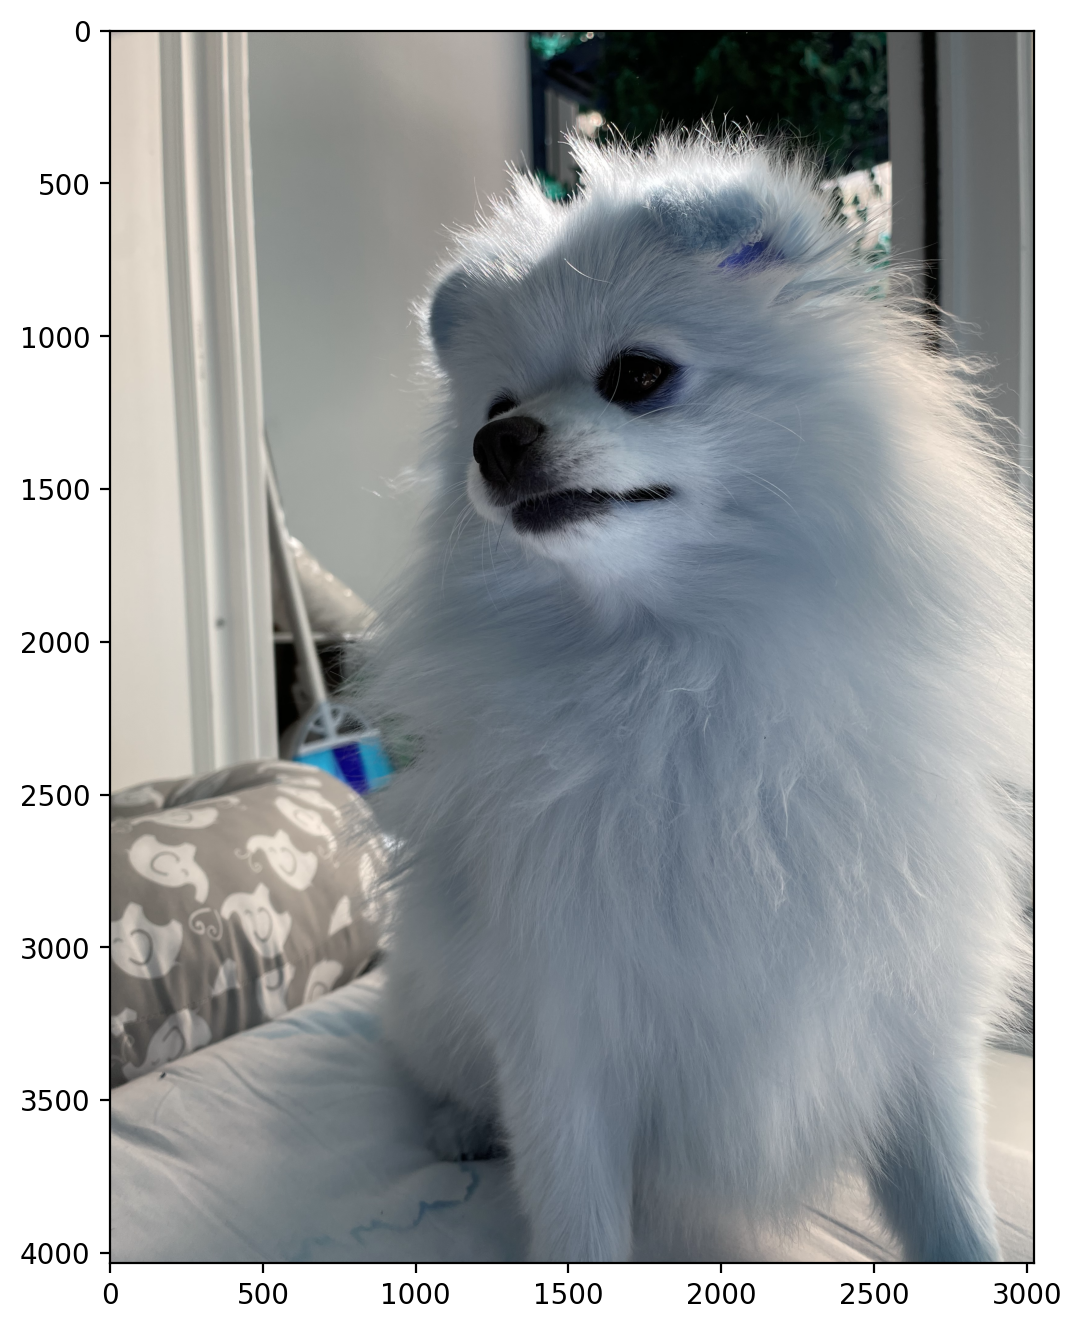

In [142]:
plt.figure(figsize=(12,8))
plt.imshow(hani)

------------------------------------------------------------------------

# 엑셀 파일 다루기

In [229]:
import openpyxl as xl

`-` 워크북 오브젝트 생성

In [230]:
wb = xl.load_workbook("df.xlsx")

`-` 시트 목록 확인

In [231]:
wb.sheetnames

## 파일 Load

In [232]:
s1 = wb["Sheet1"]

### 셀이름으로 값 확인

In [233]:
s1["A1"].value

### 행과 열 변호로 셀 값확인

In [234]:
s1.cell(row=1,column =1).value

In [236]:
s1.cell(row=2,column =6).value

### 데이터 영역 확인

In [237]:
print(s1.min_row,s1.max_row)
print(s1.min_column,s1.max_column)

1 21
1 6

### ex1. 반복문을 이용해서 데이터를 출력

In [254]:
for i in range(s1.min_row,s1.max_row+1) :
    for j in range(s1.min_column,s1.max_column+1) :
        print(s1.cell(row = i, column=j).value,end=" | ")
    print("\n")

date | A | B | C | D | sex | 

2020-12-25 | 1.624345363663242 | -0.6117564136500754 | -0.5281717522634557 | -1.072968622156171 | F | 

2020-12-26 | 0.8654076293246785 | -2.301538696880283 | 1.74481176421648 | -0.7612069008951028 | M | 

2020-12-27 | 0.3190390960570985 | -0.2493703754774101 | 1.462107937044974 | -2.060140709497654 | F | 

2020-12-28 | -0.3224172040135075 | -0.3840543546684156 | 1.133769442335437 | -1.099891267314031 | M | 

2020-12-29 | -0.1724282075504357 | -0.8778584179213718 | 0.0422137467155928 | 0.5828152137158222 | F | 

2020-12-30 | -1.100619177212921 | 1.144723709839614 | 0.9015907205927955 | 0.5024943389018682 | M | 

2020-12-31 | 0.9008559492644118 | -0.6837278591743331 | -0.1228902255186481 | -0.9357694342590688 | F | 

2021-01-01 | -0.2678880796260159 | 0.530355466738186 | -0.691660751725309 | -0.3967535268559773 | M | 

2021-01-02 | -0.6871727001195994 | -0.8452056414987196 | -0.671246130836819 | -0.0126645989189013 | F | 

2021-01-03 | -1.117310348635278 |

`-` 원데이터 확인

In [257]:
_df = pd.read_excel("df.xlsx")
_df

------------------------------------------------------------------------

## 엑셀값 수정

-   `date` $\to$ `날짜`로 ㄹ바꿔보자

In [258]:
s1["A1"].value = "날짜"

In [259]:
s1.cell(row=1,column=1).value

`-` 그러나 아직 파일에는 반영이 되지 않았음

### 원본에 파일 반영하여 저장

In [260]:
wb.save("df.xlsx")

`-` 다시 load후 결과 확인

In [282]:
wb = xl.load_workbook("df.xlsx")

In [283]:
s1 = wb["Sheet1"]

In [284]:
s1.cell(row=1,column=1).value

### ex1. `sex` $\to$ `성별`

In [285]:
s1.cell(row=1,column=6).value

In [286]:
s1["F1"].value = "성별"

In [287]:
wb.save("df.xlsx")

In [288]:
wb = xl.load_workbook("df.xlsx")
s1 = wb["Sheet1"]
s1.cell(row=1,column=6).value

### 행 추가

`-` 워크북 오브젝트 생성

In [290]:
wb = xl.load_workbook("df.xlsx")

In [293]:
s1 = wb["Sheet1"]

`-` 두 번째 행에 빈 행 추가

In [294]:
s1.insert_rows(2)

`-` 빈 값이 들어간 것을 확인

In [297]:
print(s1.cell(2, 1).value, s1.cell(2, 2).value)b

None None

### 열 추가

In [298]:
s1.insert_cols(7)

`-` 빈 값이 들어간 것을 확인

In [300]:
print(s1.cell(1, 7).value, s1.cell(2, 7).value)

None None

`-` 전체 데이터 확인

In [301]:
for i in range(s1.min_row,s1.max_row+1) :
    for j in range(s1.min_column,s1.max_column+1) :
        print(s1.cell(row = i, column=j).value,end=" | ")
    print("\n")

날짜 | A | B | C | D | 성별 | None | 

None | None | None | None | None | None | None | 

2020-12-25 | 1.624345363663242 | -0.6117564136500754 | -0.5281717522634557 | -1.072968622156171 | F | None | 

2020-12-26 | 0.8654076293246785 | -2.301538696880283 | 1.74481176421648 | -0.7612069008951028 | M | None | 

2020-12-27 | 0.3190390960570985 | -0.2493703754774101 | 1.462107937044974 | -2.060140709497654 | F | None | 

2020-12-28 | -0.3224172040135075 | -0.3840543546684156 | 1.133769442335437 | -1.099891267314031 | M | None | 

성별 | -0.1724282075504357 | -0.8778584179213718 | 0.0422137467155928 | 0.5828152137158222 | F | None | 

2020-12-30 | -1.100619177212921 | 1.144723709839614 | 0.9015907205927955 | 0.5024943389018682 | M | None | 

2020-12-31 | 0.9008559492644118 | -0.6837278591743331 | -0.1228902255186481 | -0.9357694342590688 | F | None | 

2021-01-01 | -0.2678880796260159 | 0.530355466738186 | -0.691660751725309 | -0.3967535268559773 | M | None | 

2021-01-02 | -0.6871727001195994 | -

### 위에서 추가한 빈 행과 열을 삭제

In [302]:
s1.delete_rows(2)
s1.delete_cols(7)

`-` 삭제 후 확인

In [303]:
for i in range(s1.min_row,s1.max_row+1) :
    for j in range(s1.min_column,s1.max_column+1) :
        print(s1.cell(row = i, column=j).value,end=" | ")
    print("\n")

날짜 | A | B | C | D | 성별 | 

2020-12-25 | 1.624345363663242 | -0.6117564136500754 | -0.5281717522634557 | -1.072968622156171 | F | 

2020-12-26 | 0.8654076293246785 | -2.301538696880283 | 1.74481176421648 | -0.7612069008951028 | M | 

2020-12-27 | 0.3190390960570985 | -0.2493703754774101 | 1.462107937044974 | -2.060140709497654 | F | 

2020-12-28 | -0.3224172040135075 | -0.3840543546684156 | 1.133769442335437 | -1.099891267314031 | M | 

성별 | -0.1724282075504357 | -0.8778584179213718 | 0.0422137467155928 | 0.5828152137158222 | F | 

2020-12-30 | -1.100619177212921 | 1.144723709839614 | 0.9015907205927955 | 0.5024943389018682 | M | 

2020-12-31 | 0.9008559492644118 | -0.6837278591743331 | -0.1228902255186481 | -0.9357694342590688 | F | 

2021-01-01 | -0.2678880796260159 | 0.530355466738186 | -0.691660751725309 | -0.3967535268559773 | M | 

2021-01-02 | -0.6871727001195994 | -0.8452056414987196 | -0.671246130836819 | -0.0126645989189013 | F | 

2021-01-03 | -1.117310348635278 | 0.23441569

------------------------------------------------------------------------

# 이메일 보내기

## import

In [309]:
import smtplib
from email.mime.text import MIMEText

## step1. 기본 셋팅

1.  지메일, 모든 설정 $\to$ 전달 및 POP/IMAP $\to$ IMAP 엑세스(IMAP 사용
    체크) $\to$ 변경사항 저장

2.  구글 계정 괸리 클랙 $\to$ 보안 $\to$ 2단계 인증 클릭 $\to$ 앱
    비밀번호 $\to$ windows, 컴퓨터 메일 오픈

3.  컴퓨터용 앱 비밀번호 복사

4.  복사 후 첫 번째 인자에는 나의 이메일을, 두 번째 인자에는 복사한
    비밀번호를 기입 후 실행

In [313]:
# smtp 주소
s = smtplib.SMTP('smtp.gmail.com', 587)

# TLS 보안 시작
s.starttls() 

## 로그인
s.login('rkdcjf8232@gmail.com', 'zfkdrzytshqsucln') 

## step2. 메일 내용구성

In [315]:
## 본문
m = MIMEText('''
메일 보내기 테스트 테스트
'''
)

## 제목
m["Subject"] = "gc test"

## step3. 메일 보내기

`-` s.sendmail(발신주소, 수신주소, 메일)

In [316]:
s.sendmail("rkdcjf8232@gmail.com","rkdcjf202150256@gmail.com",m.as_string())
s.quit()

## step4. 메일 확인

<img src = "test2.png" width =  240>